In [27]:
import tensorflow as tf
import numpy as np

In [28]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
N1 = 100
r = np.random.uniform(0,1,N1)
theta = np.random.uniform(0,1,N1)*2*np.pi
x1 = r*np.cos(theta)
x2 = r*np.sin(theta)
dataX1 = r*[np.cos(theta), np.sin(theta)]
dataX1 = np.transpose(dataX1)
dataY1 = np.ones((N1))
N2 = 200
r = np.random.uniform(2,3,N2)
theta = np.random.uniform(0,1,N2)*2*np.pi
x1 = r*np.cos(theta)
x2 = r*np.sin(theta)
dataX2 = r*[np.cos(theta), np.sin(theta)]
dataX2 = np.transpose(dataX2)
dataY2 = np.zeros((N2))

In [33]:
dataX = np.concatenate((dataX1,dataX2),axis = 0)
print(dataX.shape)
dataY = np.concatenate((dataY1,dataY2),axis = 0)
dataY = dataY.reshape(300,1)
print(dataY.shape)

(300, 2)
(300, 1)


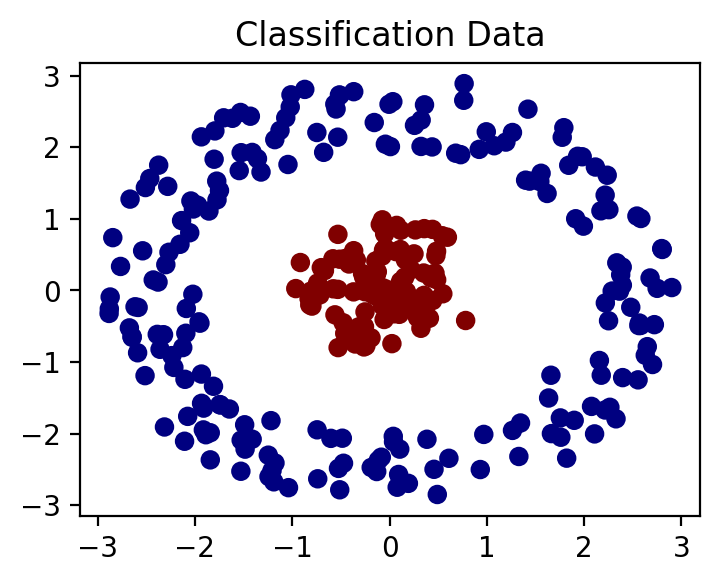

In [35]:
fig = plt.figure(figsize=(4, 3), dpi=200)
plt.scatter(dataX[:, 0], dataX[:, 1], c=dataY[:,0], cmap= 'jet')
plt.title('Classification Data')
plt.show()

## ResNet with Tensorflow $n = 5$

In [43]:
tf.reset_default_graph()

In [44]:
n_inputs = 2
n_hidden = 2 
n_outputs = 1 

In [45]:
p_c1 = []
p_c2 = []
X = tf.placeholder(tf.float32, shape = (None, n_inputs), name = "X")
y = tf.placeholder(tf.float32, shape = (None,1), name = "y")
Us = {
    'u1': tf.Variable(tf.random_normal([2, 1])),
    'u2': tf.Variable(tf.random_normal([2, 1])),
    'u3': tf.Variable(tf.random_normal([2, 1])),
    'u4': tf.Variable(tf.random_normal([2, 1])),
    'u5': tf.Variable(tf.random_normal([2, 1]))
}

Vs = {
    'v1': tf.Variable(tf.random_normal([1, 2])),
    'v2': tf.Variable(tf.random_normal([1, 2])),
    'v3': tf.Variable(tf.random_normal([1, 2])),
    'v4': tf.Variable(tf.random_normal([1, 2])),
}

biases = {
    'b1': tf.Variable(tf.random_normal([1])),
    'b2': tf.Variable(tf.random_normal([1])),
    'b3': tf.Variable(tf.random_normal([1])),
    'b4': tf.Variable(tf.random_normal([1]))
}

In [46]:
def simple_resnet(x):
    layer11 = tf.nn.relu(tf.add(tf.matmul(x, Us['u1']), biases['b1']))
    layer1 = tf.matmul(layer11, Vs['v1'])
    layer1 = tf.add(layer1, x)
    layer21 = tf.nn.relu(tf.add(tf.matmul(layer1, Us['u2']), biases['b2']))
    layer2 = tf.matmul(layer21, Vs['v2'])
    layer2 = tf.add(layer2, layer1)
    layer31 = tf.nn.relu(tf.add(tf.matmul(layer2, Us['u3']), biases['b3']))
    layer3 = tf.matmul(layer31, Vs['v3'])
    layer3 = tf.add(layer3, layer2)
    layer41 = tf.nn.relu(tf.add(tf.matmul(layer3, Us['u4']), biases['b4']))
    layer4 = tf.matmul(layer41, Vs['v4'])
    layer4 = tf.add(layer4, layer3)
    output = tf.nn.sigmoid(tf.matmul(layer4, Us['u5']))
    return output

In [47]:
logits = simple_resnet(X)
train_x = dataX
train_y = dataY
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels= y))
optimizer = tf.train.AdamOptimizer(0.001)
train_op = optimizer.minimize(loss)

In [48]:
model = tf.global_variables_initializer()
batch_size = 15
with tf.Session() as sess:
    sess.run(model)
    for epoch in range(400):
        for step in range(20):
            batch_x = train_x[step*batch_size:(step+1)*batch_size,:]
            batch_y = train_y[step*batch_size:(step+1)*batch_size]
            _, cost = sess.run([train_op, loss], feed_dict = {X: batch_x, y: batch_y})
    y_hat = tf.round(logits)
    print(y_hat)
    correct_pred = tf.equal(y_hat, y)
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    print("Accuracy: ", accuracy.eval({X:train_x, y: train_y}))
    out = sess.run(y_hat, feed_dict={X: train_x})
    for i in range(300):
        if out[i,0] == 1:
            p_c1.append(i)
        else:
            p_c2.append(i)

Tensor("Round:0", shape=(?, 1), dtype=float32)
Accuracy:  1.0


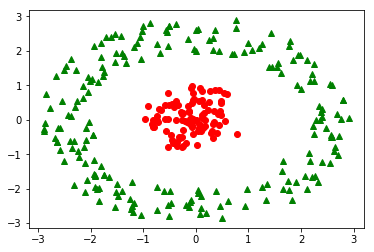

In [49]:
plt.plot(dataX[p_c1,0], dataX[p_c1,1], 'ro')
plt.plot(dataX[p_c2,0], dataX[p_c2,1], 'g^')